# Facebook Ads
*Jaime Avendaño*  
  
This is a logistic regression notebook. The objective is to predict whether or not a customer will click on an add in Facebook.

### Dataset:
* Names
* Emails
* Country
* Time Spent on Site
* Salary

### Target:
* Clicked

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from janitor import clean_names
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from joblib import dump

In [21]:
train = pd.read_csv('Course_Data\Facebook_Ads_2.csv', encoding='latin-1')
train = train.clean_names()
train.head()

,names,emails,country,time_spent_on_site,salary,clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
train.shape

(499, 6)

# EDA

In [5]:
# Balanced dataset
train.clicked.value_counts()

1    250
0    249
Name: clicked, dtype: int64

<Figure size 864x432 with 0 Axes>

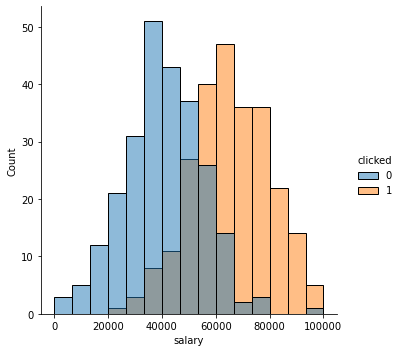

In [6]:
plt.figure(figsize=(12, 6))
sns.displot(data=train, x='salary', hue='clicked')

<Figure size 864x432 with 0 Axes>

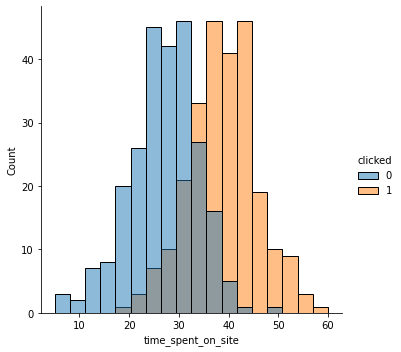

In [7]:
plt.figure(figsize=(12, 6))
sns.displot(data=train, x='time_spent_on_site', hue='clicked')

In [8]:
countries = train.country.value_counts()
print(f'# of Countries = {len(countries)}')
print(f'# of Countries w/ 1 user = {len(countries[countries == 1])}')
print(f'Max # of users = {max(countries)}')

# of Countries = 210
# of Countries w/ 1 user = 58
Max # of users = 6


In [9]:
email_providers = train.emails.str.split('@').str[-1].value_counts()
print(f'# of Email Providers = {len(email_providers)}')
print(f'# of Email Providers w/ 1 user = {len(email_providers[email_providers == 1])}')
print(f'Max # of users = {max(email_providers)}')

# of Email Providers = 481
# of Email Providers w/ 1 user = 464
Max # of users = 3


# Data Cleaning

1. Drop columns: names, emails, & country
2. Standard Scaler: salary & time

In [10]:
train = train.drop(columns=['names', 'emails', 'country'])

In [11]:
scaler = StandardScaler()
num_features = ['salary', 'time_spent_on_site']

scaler.fit(train[num_features])
train_scaled = pd.DataFrame(scaler.transform(train[num_features]), columns=num_features)
train = pd.concat([train.drop(columns=num_features), train_scaled], axis=1)

In [12]:
train.head()

,clicked,salary,time_spent_on_site
0,0,0.128258,-0.799458
1,1,1.378592,-0.051029
2,0,-0.621945,-1.316667
3,1,-0.830444,2.322233
4,0,-0.819281,0.146196


# Model Training

In [13]:
X = train.drop(columns=['clicked']).values
y = train.clicked.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Model Testing

In [16]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

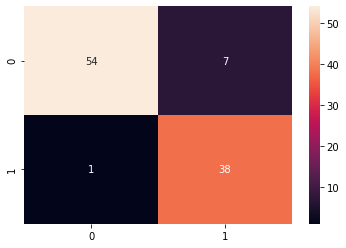

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



# Export Model

In [19]:
dump(scaler, 'Model_Data/facebook_ads_scaler.joblib')
dump(classifier, 'Model_Data/facebook_ads_classifier.joblib')

['Model_Data/facebook_ads_classifier.joblib']

In [26]:
train.time_spent_on_site.mean()

32.92017833020841